In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### 2D Temperature Heat Map (Blowtorch at Center)

Create a grid of points

In [2]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
X.shape
Y.shape

(100, 100)

(100, 100)

Define the temperature function: hottest at center, cooler further away

Formula: Z = 10 - (X^2 + Y^2)

In [3]:
Z = 10 - (X**2 + Y**2)
Z.shape

(100, 100)

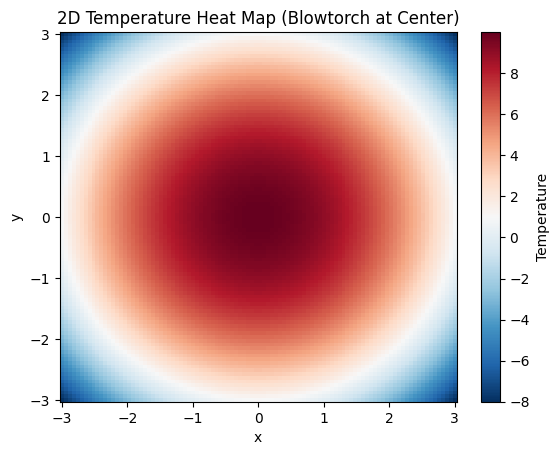

In [4]:
# cmap='RdBu_r': This selects a "Red to Blue" colormap. The _r suffix reverses it.
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='auto')
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.title('2D Temperature Heat Map (Blowtorch at Center)')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

If you were to place an arrow (gradient vector) at any point on above plot, it would point directly toward the bright red center, as that is the direction of the "steepest increase" in temperature.

Next we are going to create a plot with gradient arrows.

### 2D Heat Map with Gradient Arrows

Create grid and temperature function

In [5]:
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = 10 - (X**2 + Y**2)

Calculate Gradient (Partial Derivatives)

- Partial Derivatives: The dx and dy represent the slopes along the x and y axes respectively. They measure how fast temperature changes in one direction while ignoring the other.

- The Gradient Vector: By combining dx and dy, we get the gradient vector (represented by the black arrows).

In [6]:
dy, dx = np.gradient(Z)
dy.shape
dx.shape

(20, 20)

(20, 20)

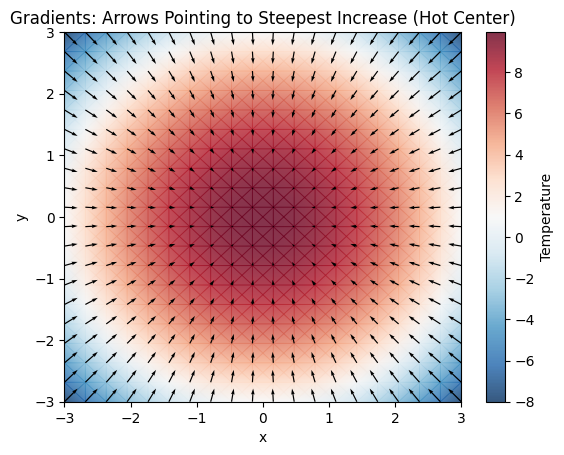

In [7]:
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='gouraud', alpha=0.8)
_ = plt.quiver(X, Y, dx, dy, color='black')  # Draw arrows pointing uphill
_ = plt.title('Gradients: Arrows Pointing to Steepest Increase (Hot Center)')
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

### 3D "Temperature Hill"

In [8]:
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(x, y)
zz = 10 - (xx**2 + yy**2)

In [9]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz, colorscale='RdBu_r'
)])

fig.update_layout(
    title='3D Temperature Hill',
    scene=dict(
        xaxis_title='x', yaxis_title='y', zaxis_title='Temperature (Z)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    ),
    width=800, height=600
)

### 3D Gaussian "Temperature Hill" (Flattens at Edges)

In [10]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

Gaussian Formula: z = A * exp(-(x^2 + y^2) / (2 * sigma^2))

This creates a "bump" that flattens out at the edges.

In [11]:
A = 10        # Peak height
sigma = 2.5   # Width of the hill
zz = A * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

In [12]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='RdBu_r', showscale=False
)])

fig.update_layout(
    title='Gaussian Temperature Hill (Flattens at Edges)',
    scene=dict(
        xaxis_title='x', yaxis_title='y', zaxis_title='Temperature (Z)',
        zaxis=dict(range=[0, 10]),  # Keep height consistent
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    ),
    width=800, height=600
)

### Visualizing Gradient Descent (For a model with 1 parameter)

y = β1x + β0 (just like y = mx + b)

β0: intercept (assume it to be zero)  
β1: slope

We need to develop a regression model.

It simply means finding out the slope (β1). Yes, exactly. We only have a single parameter here.

In [13]:
x = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 0.9])
y = np.array([0.1, 0.15, 0.4, 0.55, 0.8, 1.2, 1.5, 1.7])
n = len(x)

**The model parameter 'm' decides the cost of the model**

In [14]:
# Model param (m) values
search_space = np.arange(0, 2.1, 0.2)  # start, stop, step
search_space
len(search_space)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

11

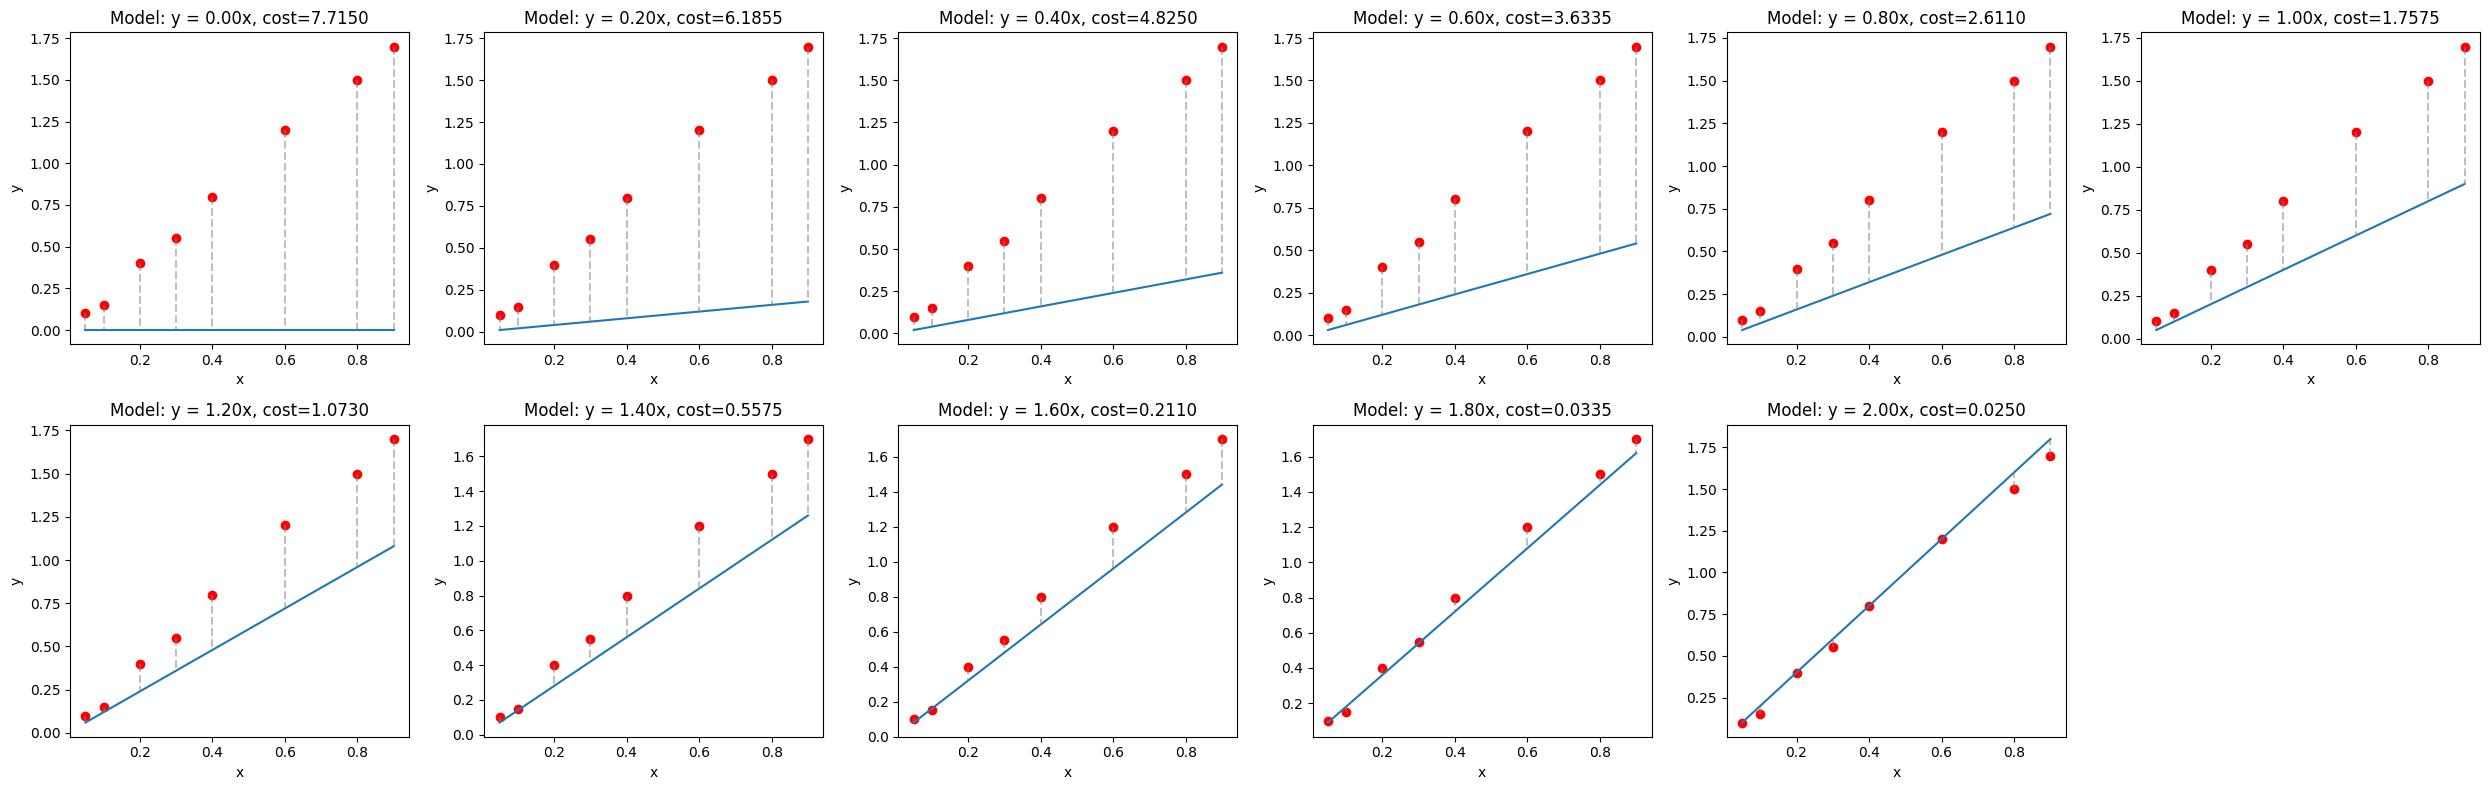

In [15]:
import math

n_plots = len(search_space)
n_cols = 6
n_rows = math.ceil(n_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4*n_rows))
axes = axes.flatten()

for idx, m in enumerate(search_space):
  y_pred = m * x  # Make predictions using Model
  cost = np.sum((y - y_pred) ** 2)  # SSR

  _ = axes[idx].scatter(x, y, color='red')
  _ = axes[idx].plot(x, y_pred)
  _ = axes[idx].vlines(x, y, y_pred, color='gray', linestyle='--', alpha=0.5)

  _ = axes[idx].set_title(f'Model: y = {m:.2f}x, {cost=:.4f}')
  _ = axes[idx].set_xlabel('x')
  _ = axes[idx].set_ylabel('y')

for j in range(idx+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()

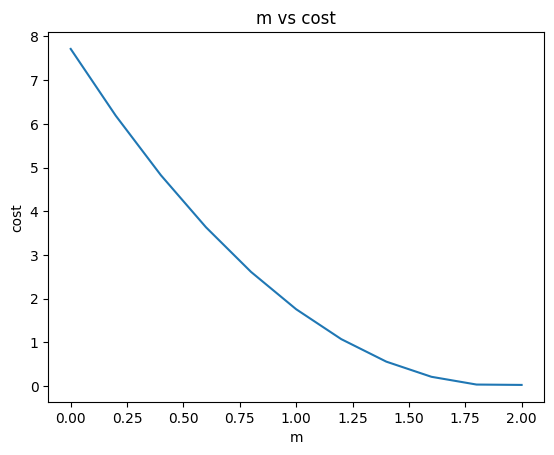

In [16]:
cost_values = [np.sum((y-m*x)**2) for m in search_space]  # SSR
_ = plt.plot(search_space, cost_values)  # x(m) -> y(cost)
_ = plt.xlabel('m')  # Model param
_ = plt.ylabel('cost')  # Error
_ = plt.title('m vs cost')

**Let's implement the gradient descent**

In [125]:
# J(β), β = [β0, β1, ...]
# But to simplify things (just 1 param), here cost is like J(β1 = m)
def cost(m):
  y_pred = m * x
  return np.sum((y - y_pred) ** 2)  # SSR

In [126]:
def grad(m):  # ∇J(β)
  return 2 * np.sum(x * (m*x - y))

In [200]:
m = 0
epoch = 0

In [270]:
# GD Update Rule: beta_new = beta_old - alpha * grad
# In this case: m_new = m_old - alpha * grad
epoch += 1

alpha = 0.1
cost_ = cost(m)
m_new = m - alpha * grad(m)
cost_new = cost(m_new)

print(f'current epoch = {epoch}')
print(f'current m = {m:.4f}')
print(f'current cost = {cost_:.4f}')
print(f'current grad = {grad(m):.4f}')
print(f'new m = {m_new:.4f}')
print(f'new cost = {cost_new:.4f}')

m = m_new

current epoch = 70
current m = 1.9101
current cost = 0.0079
current grad = -0.0000
new m = 1.9101
new cost = 0.0079
